In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
import argparse
import os

In [4]:
plt.rcParams["figure.figsize"] = (10,10)

In [5]:
img_input = cv2.imread("./test_image.jpg",0)


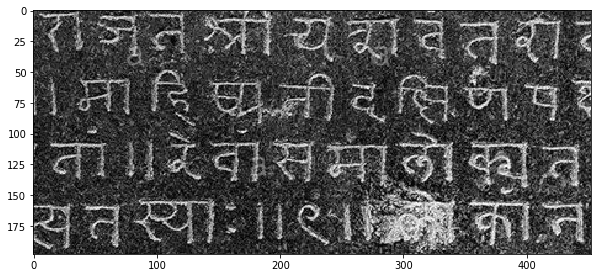

In [6]:
plt.imshow(img_input ,'gray')

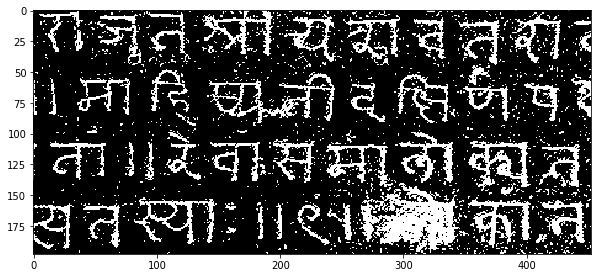

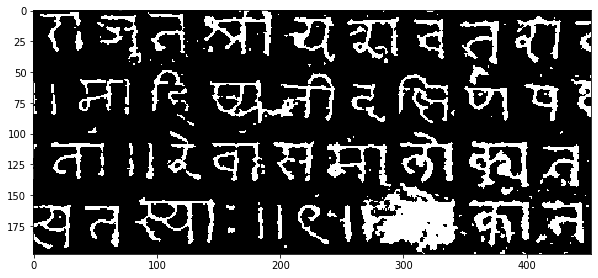

In [7]:
# ret,img = cv2.threshold(op,140,255,cv2.THRESH_BINARY)
ret,img_thre = cv2.threshold(img_input,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#img_thre = 255 - img_thre
plt.imshow(img_thre,'gray')
plt.show()

img_denoise = cv2.medianBlur(img_thre,3)
plt.imshow(img_denoise,'gray')


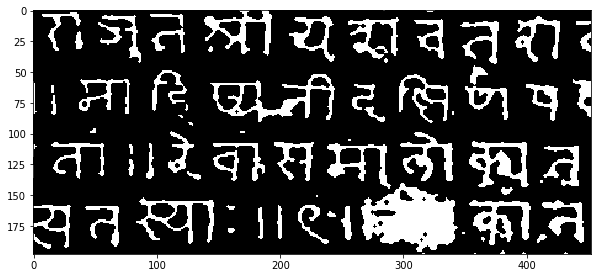

In [8]:
kernel = np.ones((3,3),np.uint8)
#img_open =  cv2.morphologyEx(img_denoise, cv2.MORPH_OPEN, kernel) 
img_close = cv2.morphologyEx(img_denoise, cv2.MORPH_CLOSE, kernel)
img = cv2.medianBlur(img_close,3)


plt.imshow(img,'gray')

In [9]:
# Write Python code here 
# import the necessary packages 

# now let's initialize the list of reference point 
ref_point = [] 
crop = False

def shape_selection(event, x, y, flags, param): 
    # grab references to the global variables 
    
    global ref_point, crop 

    # if the left mouse button was clicked, record the starting 
    # (x, y) coordinates and indicate that cropping is being performed 
    if event == cv2.EVENT_LBUTTONDOWN: 
        ref_point = [(x, y)] 

    # check to see if the left mouse button was released 
    elif event == cv2.EVENT_LBUTTONUP: 
        # record the ending (x, y) coordinates and indicate that 
        # the cropping operation is finished 
        ref_point.append((x, y)) 

        # draw a rectangle around the region of interest 
        cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2) 
        cv2.imshow("image", image) 




# load the image, clone it, and setup the mouse callback function 
image = img 
clone = image.copy() 
cv2.namedWindow("image") 
cv2.setMouseCallback("image", shape_selection) 


# keep looping until the 'q' key is pressed 
while True: 
	# display the image and wait for a keypress 
    cv2.imshow("image", image) 
    key = cv2.waitKey(1) & 0xFF

    # press 'r' to reset the window 
    if key == ord("r"): 
        image = clone.copy() 

	# if the 'c' key is pressed, break from the loop 
    elif key == ord("c"): 
        break

if len(ref_point) == 2: 
    crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]: 
                                                        ref_point[1][0]]
    a=ref_point[0]
    b=ref_point[1]
    xt=(a[0]+b[0])//2
    yt=(a[1]+b[1])//2
    cv2.imshow("crop_img", crop_img) 
    cv2.waitKey(0)


# close all open windows 
cv2.destroyAllWindows() 


In [10]:
l=int(crop_img.shape[0]/2)
w=int(crop_img.shape[1]/2)

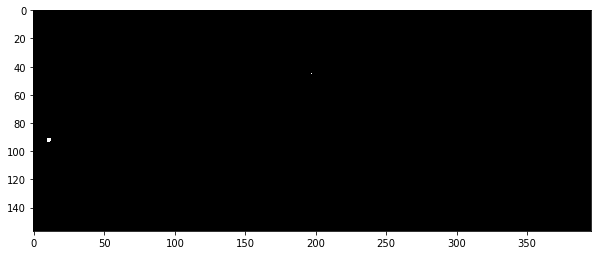

In [11]:
ret=cv2.matchTemplate(img,crop_img,cv2.TM_CCORR_NORMED)
op=np.zeros(ret.shape)
for i in range(ret.shape[0]):
    for j in range(ret.shape[1]):
        if(ret[i][j]>0.65):
            op[i][j]=255

plt.imshow(op,'gray')

In [12]:
ind = np.where(op==255)
print(len(ind[0]))

9


In [13]:
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(4, 4), visualize=True, multichannel=False)


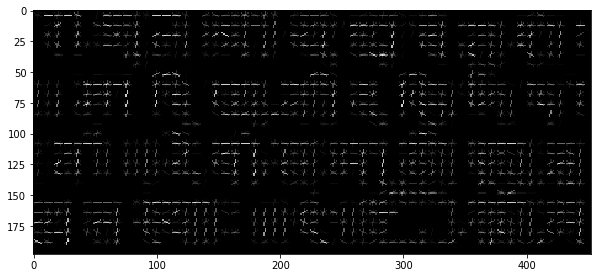

In [14]:
plt.imshow(hog_image,'gray')

In [15]:
def splitting(img):
    l,w = img.shape[0:2]
    l1 = int(l/2)
    w1 = int(w/2)
    
    s = []
    s.append(img[0:l1,0:w1])
    s.append(img[0:l1,w1:])
    s.append(img[l1:,0:w1])
    s.append(img[l1:,w1:])
    s.append(img[0:l1,:])
    s.append(img[l1:,:])
    s.append(img[:,0:w1])
    s.append(img[:,w1:])
    
    return s

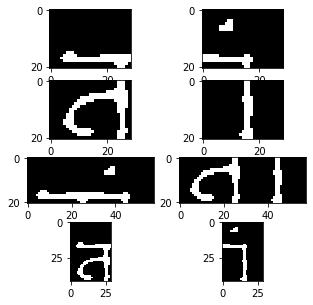

In [17]:
splitted = splitting(crop_img)
plt.figure(figsize=(5,5))
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.imshow(splitted[i], 'gray')
plt.show()